Olá!

Me chamo Natan Freitas e fico feliz em revisar o seu projeto hoje.

Quando eu identificar um erro pela primeira vez, eu irei apenas apontá-lo. Vou deixar que você identifique e conserte o erro, pois estou buscando te preparar para trabalhar como um Analista/Cientista de Dados. Em um cenário real, a sua liderança faria o mesmo. Caso você não consiga encontrar o erro, vou dar dicas mais precisas na próxima revisão.

Meus comentários serão neste formato abaixo, **por favor, não mova, edite ou apague os comentários**.

Eles serão em caixas verdes, amarelas ou vermelhas, conforme abaixo:


<div class="alert alert-danger">
<strong>Comentário do revisor</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Comentário do revisor</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Comentário do revisor</strong>

Elogios

</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
    
</div>

<div class="alert alert-success">
<strong>Comentários gerais do revisor</strong>

Muito obrigado pelo envio do seu projeto!
    
A sua entrega atendeu a todos os requisitos e seu _notebook_ está muito bem organizado e a linha de raciocínio que construiu está bem direta e clara.
    
Parabéns. Continue assim!

</div>

# Introdução
Este projeto de ciência de dados tem como objetivo desenvolver um protótipo de modelo de aprendizado de máquina para a Zyfra, uma empresa especializada em soluções de eficiência para a indústria pesada. A empresa está interessada em otimizar a produção de ouro puro a partir do minério de ouro, eliminando parâmetros não rentáveis e buscando aumentar a eficiência do processo de extração e purificação. Esse projeto será desenvolvido em 3 fases;<br>
1-**Preparação dos dados.**<br>
Uma verificação nos dados para localizar e corrigir erros.<br>
2-**Análise dos dados.**<br>
Nessa fase vamos ter um entendimento melhor dos dados para tomar melhores decisões de como desenvolver o projeto.<br>
3-**Construção dos modelos.**<br>
Nessa fase os modelos serão treinados, testados e otimizados.<br>
No final será selecionado o modelo com o melhor desempenho.<br>

# Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,train_test_split

import warnings
warnings.filterwarnings('ignore')

## Preparando os dados

### Carregamento dos dados

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv',index_col='date')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv',index_col='date')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv',index_col='date')

Para esse projeto foi fornecido três conjuntos de dados e eles foram armazenados em "data_train" para o cojunto de treinamento, "data_test" para o conjunto de teste e "data_full" que contem todo os dados. Os dados de treino e teste são resultado da divizão do "data_ful" que podemos chamar de dados de origem.

### Análise inicial

In [3]:
# Amostra dos dados completos.
data_full.head(3)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [4]:
# Amostra dos dados de treinamento.
data_train.head(3)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [5]:
# Amostra dos dados de teste.
data_test.head(3)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


Os dados tem muitas colunas, será difícil análisar elas separadamente. A coluna teste tem colunas a menos.

In [6]:
# Informações gerais dos dados.
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                             

In [7]:
# Informações gerais dos dados de treino.
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                             

In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 non-null

Existem valores ausentes nos dados de origem, consequentemente os dados de treino e teste também possuem valores ausentes. Os tipos estão certos. Os dados de teste tem colunas ausentes, primeiro vou estudar os dados para saber qual dessas colunas serão relevante para o treinamento e uso do futuro modelo.

<div class="alert alert-success">
<strong>Comentário do revisor</strong>

Bom trabalho com a exploração inicial após o carregamento dos dados.

</div>

### Calculo de retirada.

É necessario verificar retirada do ouro, existe uma formula para calculá-la.<br>
Onde:<br>

<li>C = proporção de ouro no concentrado logo após a flotação (para encontrar a quantidade retirada do concentrado bruto)/após a purificação (para encontrar a quantidade retirada final do concentrado).
<li>F = a proporção de ouro alimentado no sistema antes da flotação (para encontrar a quantidade retirada do concentrado bruto)/ quantidade no concentrado logo após a flotação (para encontrar a quantidade retirada final do concentrado).
<li>T = a proporção de ouro nos restos de minério bruto logo após a flotação (para encontrar a quantidade retirada do concentrado bruto)/ quantidade após a purificação (para encontrar a quantidade retirada final do concentrado).

Para prever o coeficiente, você precisará encontrar a proporção de ouro no concentrado e nos restos de minério. Observe que tanto os concentrados finais quanto os brutos importam.<br>
Esse calculo está presente nos dados, o calculo para o concentrado bruto esta na coluna "rougher.output.recovery".

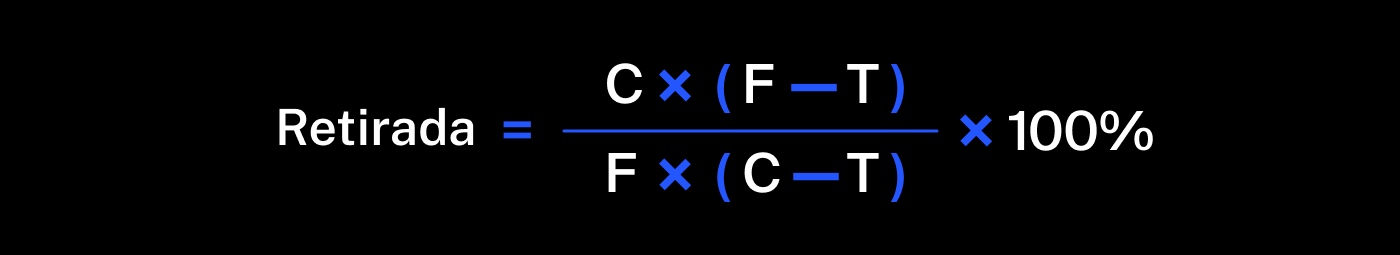

In [9]:
# Função para calcular a retirada.
def retirada(c,f,t):
    retirada = (c*(f-t))/(f*(c-t))*100
    return retirada

In [10]:
# Separação dos dados para calcular os concentrados brutos.
c = data_train.dropna()['rougher.output.concentrate_au']
f = data_train.dropna()['rougher.input.feed_au']
t = data_train.dropna()['rougher.output.tail_au']

Os dados possuiam valores negativos e para não dar erro na execução da função eles foram retirados.

In [11]:
# Resultado da formula em simula.
simula = retirada(c,f,t)
# Calculo dos dados de origem.
real = data_train.dropna()['rougher.output.recovery']

# erro quradratico médio.
print(f'{float(mean_absolute_error(real,simula)):.16f}')

0.0000000000000095


O resultado do EAM ou MAE foi muito baixa então vamos assumir que a coluna "rougher.output.recovery" esta certa.

<div class="alert alert-success">
<strong>Comentário do revisor</strong>

Bom trabalho!

</div>

###  Identificando colunas faltantes e presentes em teste.

In [12]:
# Colunas presentes em teste e treino
list(set(data_train.columns.intersection(set(data_test.columns))))

['primary_cleaner.state.floatbank8_d_level',
 'secondary_cleaner.state.floatbank5_a_air',
 'rougher.input.feed_rate',
 'primary_cleaner.state.floatbank8_a_level',
 'rougher.state.floatbank10_b_air',
 'secondary_cleaner.state.floatbank3_a_air',
 'rougher.input.feed_sol',
 'rougher.input.floatbank10_xanthate',
 'secondary_cleaner.state.floatbank4_a_air',
 'secondary_cleaner.state.floatbank6_a_air',
 'primary_cleaner.state.floatbank8_c_air',
 'secondary_cleaner.state.floatbank5_b_air',
 'secondary_cleaner.state.floatbank3_b_air',
 'rougher.state.floatbank10_f_level',
 'rougher.state.floatbank10_a_air',
 'rougher.input.feed_pb',
 'primary_cleaner.state.floatbank8_d_air',
 'secondary_cleaner.state.floatbank4_b_air',
 'secondary_cleaner.state.floatbank4_b_level',
 'rougher.state.floatbank10_d_air',
 'secondary_cleaner.state.floatbank6_a_level',
 'primary_cleaner.state.floatbank8_a_air',
 'rougher.input.feed_ag',
 'secondary_cleaner.state.floatbank2_b_level',
 'primary_cleaner.input.feed_size

In [13]:
# Laço para descobrir quais colunas não estão presentes em teste.
n_test = []
for i in data_full.columns:
    if i not in data_test.columns:
        n_test.append(i)
display(list(n_test))

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

 O conjunto de teste possue dados de entrada e não de saida, provalvelmente esses são os dados usados para o treinamento do modelo já que ele precisa prever os valores de saida usando os valores de entrada. Os valores das colunas "rougher.output.recovery" e "final.output.recovery" também não estão disponíveis, elas são o objetivo do modelo, será necessario adicionar essas colunas para podermos calcular o sMAP final. Podemos calcular elas e adicionar ao conjunto ou pegar essas informações do cojunto de origem.

### Pré-processamento

Existem muitas colunas com valores ausentes, para substituir por esses valores por algum equivalente é necessario estudar cada coluna para achar um valor que faça sentido, como existem muitas colunas essa bordagem é desvantajosa. Então vou eliminar as linhas em que se tem valores ausentes e também as colunas duplicadas.

In [14]:
# Realize o merge dos conjuntos de dados utilizando as colunas de índice como base
data_test = data_test.merge(data_full[['final.output.recovery', 'rougher.output.recovery']],
                            left_index=True, right_index=True,
                            how='left')

O conjunto de teste estava sem os objetivos a serem previsto, usando o merge foi adicionado as colunas que faltavam baseado na data que esta sendo usado como index dos cojuntos de dados. 

In [15]:
# Tirando os dados ausentes.
data_train.dropna(inplace=True)
data_test.dropna(inplace=True)
data_full.dropna(inplace=True)

In [16]:
#tirando os dados duplicados.
data_train.drop_duplicates(inplace=True)
data_test.drop_duplicates(inplace=True)
data_full.drop_duplicates(inplace=True)

<div class="alert alert-warning">
<strong>Comentário do revisor</strong>

Bom trabalho tratando dados nulos e duplicados.
    
Uma das informações disponíveis no projeto, de que os parâmetros próximos são semelhantes, podem ajudar a realizar uma imputação de dados, caso considere que irá melhorar os resultados da análise que está realizando.

</div>

In [17]:
# Verificando os novos conjuntos.
print('Dados de treino',data_train.shape[0])
print('Dados de teste',data_test.shape[0])
print('Dados de origem',data_full.shape[0])

Dados de treino 11017
Dados de teste 5229
Dados de origem 16094


In [18]:
# Comparando a proporção.
print('Dados de treino e de teste',data_train.shape[0]+data_test.shape[0])
print('Dados de origem ',data_full.shape[0])

Dados de treino e de teste 16246
Dados de origem  16094


In [19]:
display(data_train.isna().sum().sum())
display(data_test.isna().sum().sum())
display(data_full.isna().sum().sum())

0

0

0

A soma dos dados de treino e teste estão maior que os dados de origem, isso aconteceu por que os dados de teste tem colunas a menos e essa colunas que não estão presentes em teste tinham valores ausentes, por enquanto isso não é um problema se em algum momento essa diferença atrapalhar o andamento do projeto um correção será feita.
<br>Os dados não possem valores ausentes nem duplicatas.

## Análise dos dados.

In [20]:
# Ouro
ouro = data_train[['rougher.input.feed_au','rougher.output.concentrate_au'\
            ,'primary_cleaner.output.concentrate_au','final.output.concentrate_au']]
# Prata
prata = data_train[['rougher.input.feed_ag','rougher.output.concentrate_ag',\
                   'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]
# Cobre
cobre = data_train[['rougher.input.feed_pb','rougher.output.concentrate_pb',\
                   'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]

In [21]:
ouro = ouro.rename(columns={'rougher.input.feed_au':'ConcentradoDeEntrada',
                     'rougher.output.concentrate_au':'ConcentradoBruto',
                     'primary_cleaner.output.concentrate_au':'ConcentradoPurificado',
                     'final.output.concentrate_au':'ConcentradoFinal'})

In [22]:
prata = prata.rename(columns={'rougher.input.feed_ag':'ConcentradoDeEntrada',
                     'rougher.output.concentrate_ag':'ConcentradoBruto',
                     'primary_cleaner.output.concentrate_ag':'ConcentradoPurificado',
                     'final.output.concentrate_ag':'ConcentradoFinal'})

In [23]:
cobre = cobre.rename(columns={'rougher.input.feed_pb':'ConcentradoDeEntrada',
                     'rougher.output.concentrate_pb':'ConcentradoBruto',
                     'primary_cleaner.output.concentrate_pb':'ConcentradoPurificado',
                     'final.output.concentrate_pb':'ConcentradoFinal'})

Foram criada 3 variaveis com os metais que seram análisados e renomeados as colunas de cada etapa para ficar mais fácil de entender.

### Concentração de metais.

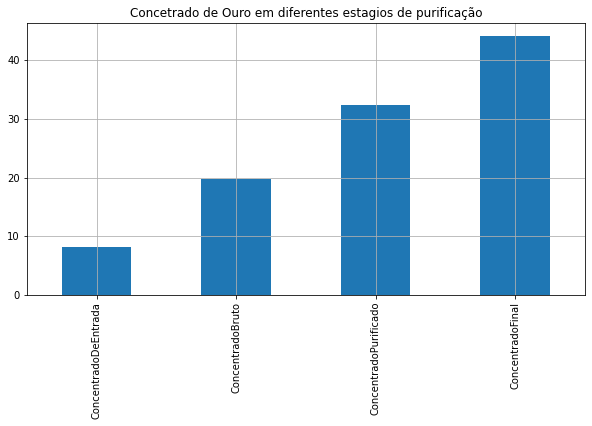

In [24]:
ouro.mean().plot(kind='bar',figsize=(10,5),grid=True)
plt.title('Concetrado de Ouro em diferentes estagios de purificação')
plt.show()

O concentrado de ouro auentou com a cada fase da purificação.

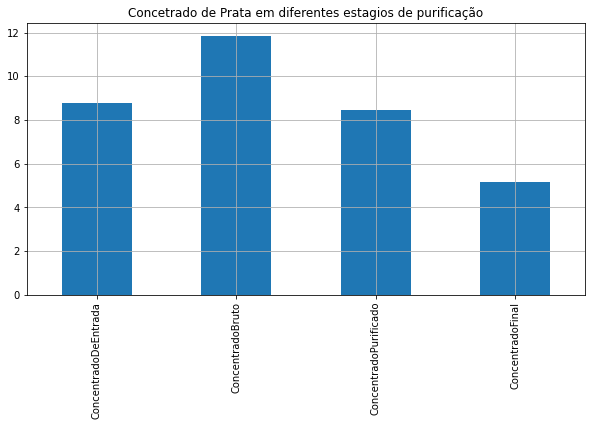

In [25]:
prata.mean().plot(kind='bar',figsize=(10,5),grid=True)
plt.title('Concetrado de Prata em diferentes estagios de purificação')
plt.show()

O concetrado de prata foi maior na primeira saida antes das fases de purificação depois disso o volume diminuiu.

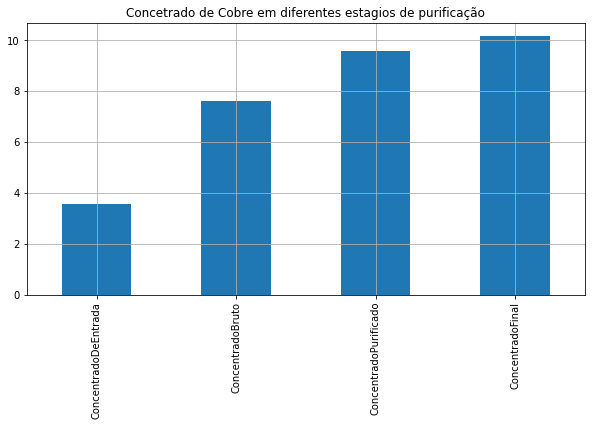

In [26]:
cobre.mean().plot(kind='bar',figsize=(10,5),grid=True)
plt.title('Concetrado de Cobre em diferentes estagios de purificação')
plt.show()

O concentrado de cobre também aumentou a cada fase da purificação. 

### Distribuição.

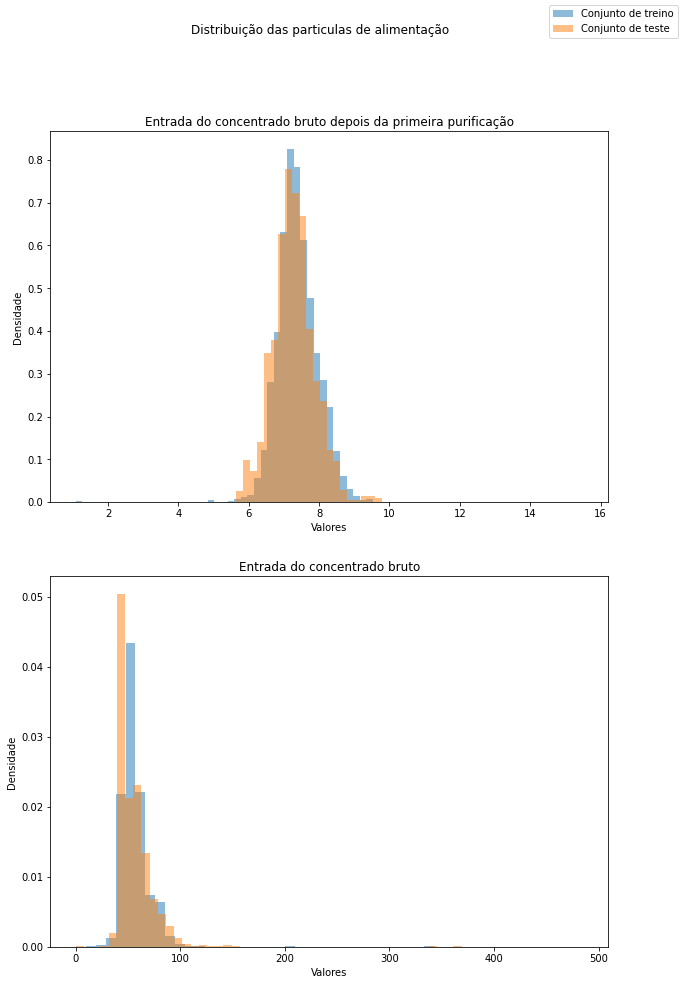

In [27]:
fig, axes = plt.subplots(2,1, figsize=(10, 15))

axes[0].hist(data_train['primary_cleaner.input.feed_size'], density=True, alpha=0.5, bins=50)
axes[0].hist(data_test['primary_cleaner.input.feed_size'], density=True, alpha=0.5, bins=50)
axes[0].set(title='Entrada do concentrado bruto depois da primeira purificação', xlabel='Valores', ylabel='Densidade')
axes[1].hist(data_train['rougher.input.feed_size'], density=True, alpha=0.5, bins=50)
axes[1].hist(data_test['rougher.input.feed_size'], density=True, alpha=0.5, bins=50)
axes[1].set(title='Entrada do concentrado bruto', xlabel='Valores', ylabel='Densidade')

fig.suptitle('Distribuição das particulas de alimentação')
fig.legend(['Conjunto de treino', 'Conjunto de teste'])

fig.show()

A distribuições tem uma divergência minima entre o conjunto de teste e treino, a avaliação do modelo não sera afetada.

### Concentração total.

In [28]:
conc_total = pd.DataFrame()
# Somando os valores de todos os metais brutos iniciais.
conc_total['entrada_bruto'] = data_train[['rougher.input.feed_ag','rougher.input.feed_pb',\
                                          'rougher.input.feed_sol', 'rougher.input.feed_au']].sum(axis=1)
#Somando os valores de todos os metais brutos depois da primeira saída.
conc_total['purificação'] = data_train[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',\
                                           'rougher.output.concentrate_sol','rougher.output.concentrate_au']].sum(axis=1)
#Somando os valores de todos os metais brutos finais.
conc_total['final'] = data_train[['final.output.concentrate_ag','final.output.concentrate_pb',\
                                         'final.output.concentrate_sol','final.output.concentrate_au']].sum(axis=1)

Foi somado os metais de cada fase para ter o valor total, os valores dos metais variam entre si somando eles fica mais facil encontrar outliers.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


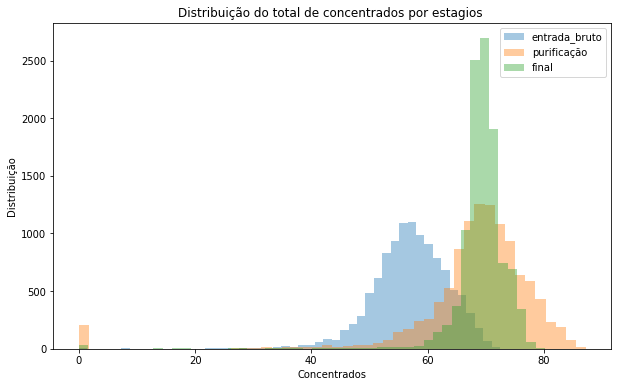

In [29]:
fig = plt.figure(figsize=(10, 6))
for column in list(conc_total):
    sns.distplot(conc_total[column], kde=False)
plt.legend(list(conc_total))
plt.title("Distribuição do total de concentrados por estagios ")
plt.xlabel("Concentrados")
plt.ylabel("Distribuição")
fig.show()

É possivel ver no gráfico um pequeno montante com valor 0, esses valores serão removidos.

<div class="alert alert-success">
<strong>Comentário do revisor</strong>

Bom trabalho com o estudo sobre a mudança de concentração, tamanho das partículas e também sobre as concentrações totais.

</div>

# Remoção dos outliers 

In [30]:

data_train1 = data_train.loc[(data_train[['rougher.input.feed_au', 'rougher.input.feed_pb', \
                                               'rougher.input.feed_ag']].sum(axis=1) > 20) \
                                  & (data_train[['rougher.output.concentrate_au', 'rougher.output.concentrate_pb', \
                                                 'rougher.output.concentrate_ag']].sum(axis=1) > 20) \
                                  & (data_train[['final.output.concentrate_au', 'final.output.concentrate_pb', \
                                                'final.output.concentrate_ag']].sum(axis=1) > 20)]

data_test1 = data_test.loc[(data_test[['rougher.input.feed_au','rougher.input.feed_pb',\
                                          'rougher.input.feed_ag']].sum(axis=1) > 20)]

Os outliers podem influenciar no treinamento do modelo então eles precisam ser removidos.

## Treinamento do modelo.

Para avaliar o modelo sera usado a métrica sMAPE que é uma métrica de avaliação de desempenho usada para medir a precisão de previsões ou modelos de previsão. Ele calcula a porcentagem média do erro absoluto entre os valores previstos e os valores reais, permitindo uma avaliação simétrica do erro positivo e negativo. Quanto menor o valor do sMAPE, mais precisa é a previsão ou o modelo.O sMAPE é uma métrica de avaliação de desempenho usada para medir a precisão de previsões ou modelos de previsão. Ele calcula a porcentagem média do erro absoluto entre os valores previstos e os valores reais, permitindo uma avaliação simétrica do erro positivo e negativo. Quanto menor o valor do sMAPE, mais precisa é a previsão ou o modelo.

# sMAPE .

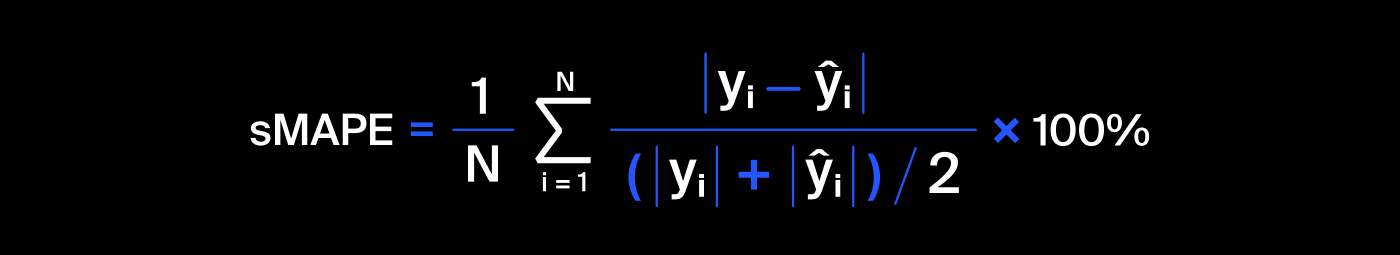

In [31]:
#Função para calcular o sMAPE.
def smape(real, predict):
    smape = np.mean(abs(predict - real) / ((abs(real) + abs(predict)) / 2)) * 100 
    return smape

<div class="alert alert-success">
<strong>Comentário do revisor</strong>

Muito bom!

</div>

# sMAPE final.

O sMAPE final vai ser calculado dando mais peso para o concentrado final, a proporção vai ser 25% para o concentrado bruto (rougher) e 75% para o concentrado final.

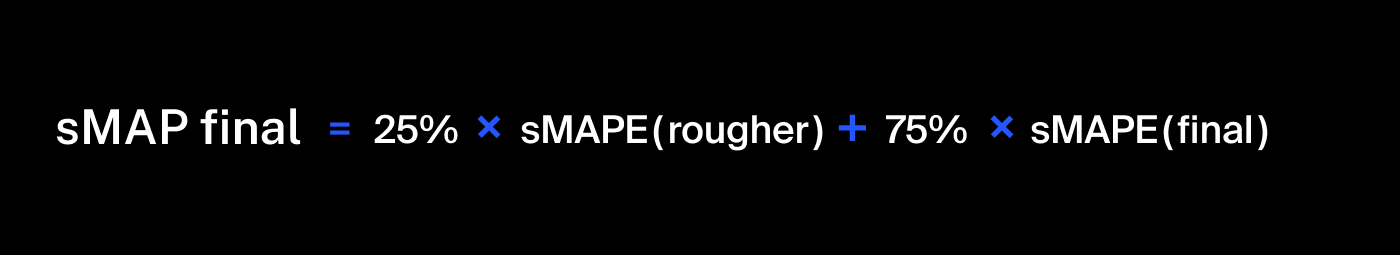

In [32]:
#Função para calcular o sMAPE final.
def f_smape(target,predict):
    predict_rough, predict_final = predict[:, 0], predict[:, 1]
    target_rough, target_final = target.iloc[:, 0], target.iloc[:, 1]
    f_smape = (0.25 * (smape(target_rough, predict_rough))) + (0.75 * (smape(target_final, predict_final)))
    return f_smape

<div class="alert alert-success">
<strong>Comentário do revisor</strong>

Muito bom!

</div>

# Função para o treinamento dos modelos.

In [33]:
def depth_test(fea,tar,modelo):
    best_result = 0
    best_depth = 0
    for depth in range(1, 16):
        model = modelo(max_depth=depth,random_state=12345)
        model.fit(fea,tar)
        predict = model.predict(x_valid)
        result = r2_score(y_valid,predict)
        if result > best_result :
            best_result = result
            best_depth = depth
    return print('O melhor de parâmetro para max_depth é: ',best_depth,'com o melhor r2 de:',best_result)

Essa função acha o melhor valor para o hiperparâmetro"max_depth" para ser usado na Árvore de Decisão e Floresta Aleatória.

In [34]:
def est_test(fea,tar,modelo,depth):
    best_result = 0
    best_dest = 0
    for est in range(1, 50):
        model = modelo(max_depth=depth,n_estimators=est,random_state=12345)
        model.fit(fea,tar)
        predict = model.predict(x_valid)
        result = r2_score(y_valid,predict)
        if result > best_result :
            best_result = result
            best_est = est
            best_model = model
    return print('O melhor de parâmetro para n_estimators: ',best_est,'com o valor r2 de:',best_result)

Essa função acha o melhor valor para o hiperparâmetro "n_estimators" usado na Floresta Aleatória.

### Preparando os dados

In [35]:
target = ['rougher.output.recovery','final.output.recovery']
features = list(set(data_train.columns).intersection(set(data_test.columns)).difference(set(target)))

x_train,y_train = data_train1[features],data_train1[target]
x_test,y_test = data_test1[features],data_test1[target]

Separação das features e targets.

In [36]:
x_train,x_valid = train_test_split(x_train,test_size=0.25, random_state=12345)
y_train,y_valid = train_test_split(y_train,test_size=0.25, random_state=12345)

Dividindo os dados de treino  em treino e validação.

### Regressão linear

In [37]:
model = LinearRegression()

In [38]:
# Validação cruzada.
scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
print('R2 médio da validação cruzada',sum(scores)/5)

R2 médio da validação cruzada 0.5160693984188576


O modelo teve um desempenho moderado em relação a métrica r2.

In [39]:
model.fit(x_train,y_train)

LinearRegression()

In [40]:
predict = model.predict(x_valid)
print('O sMAPE final para a validação é de:',f_smape(y_valid,predict))

O sMAPE final para a validação é de: 5.20741565655197


In [41]:
predict = model.predict(x_test)
print('O sMAPE final para teste é de:',f_smape(y_test,predict))

O sMAPE final para teste é de: 8.11376224619981


O desempenho do modelo teve uma diferença de 3% entre o conjunto de validação e teste.

<div class="alert alert-success">
<strong>Comentário do revisor</strong>

Bom trabalho com o uso do modelo de Regressão Linear.
    
Principalmente, parabéns pelo uso correto das bases de treino, validação e teste.

</div>

### Arvóre de decisão

In [42]:
%%time
depth_test(x_train,y_train,DecisionTreeRegressor)

O melhor de parâmetro para max_depth é:  11 com o melhor r2 de: 0.566418458180157
CPU times: user 2.95 s, sys: 76.1 ms, total: 3.02 s
Wall time: 3.06 s


In [43]:
model = DecisionTreeRegressor(max_depth=12,random_state=12345)

In [44]:
# Validação cruzada.
scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
print('R2 médio da validação cruzada',sum(scores)/5)

R2 médio da validação cruzada 0.5181166854995722


O r2 score também foi mediano.

In [45]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=12, random_state=12345)

In [46]:
predict = model.predict(x_valid)
print('O sMAPE final para a validação é de:',f_smape(y_valid,predict))

O sMAPE final para a validação é de: 4.635254827935042


In [47]:
predict = model.predict(x_test)
print('O sMAPE final para teste é de:',f_smape(y_test,predict))

O sMAPE final para teste é de: 9.978096635218272


A Árvore de Decissão teve um desempenho melhor para o conjunto de vaidação e pior para o conjunto de treino.

<div class="alert alert-success">
<strong>Comentário do revisor</strong>

Bom trabalho com o uso do modelo de Árvore de Decisão.
    
Principalmente, parabéns pelo uso correto das bases de treino, validação e teste.

</div>

### Floresta aleatória

In [48]:
%%time
depth_test(x_train,y_train,RandomForestRegressor)

O melhor de parâmetro para max_depth é:  15 com o melhor r2 de: 0.744621103651478
CPU times: user 2min 51s, sys: 89.4 ms, total: 2min 51s
Wall time: 3min


In [49]:
%%time
est_test(x_train,y_train,RandomForestRegressor,15)

O melhor de parâmetro para n_estimators:  49 com o valor r2 de: 0.7412101976785503
CPU times: user 3min 41s, sys: 110 ms, total: 3min 41s
Wall time: 3min 42s


In [50]:
model = RandomForestRegressor(max_depth=15, n_estimators=45, random_state=12345)

In [51]:
# Validação cruzada.
scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
print('R2 médio da validação cruzada',sum(scores)/5)

R2 médio da validação cruzada 0.7283917280544078


A Floresta Aleatória teve o melhor desempenho em relação a métrica r2.

In [52]:
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, n_estimators=45, random_state=12345)

In [53]:
predict = model.predict(x_valid)
print('O sMAPE final para a validação é de:',f_smape(y_valid,predict))

O sMAPE final para a validação é de: 3.600782706977662


In [54]:
predict = model.predict(x_test)
print('O sMAPE final para teste é de:',f_smape(y_test,predict))

O sMAPE final para teste é de: 8.833221912066891


A diferença entre o sMAPE do conjunto de validação e teste é bem alta com uma diferença de 5%.

<div class="alert alert-success">
<strong>Comentário do revisor</strong>

Bom trabalho com o uso do modelo de Floresta Aleatória.
    
Principalmente, parabéns pelo uso correto das bases de treino, validação e teste.

</div>

## Conclusão

Neste projeto, buscamos desenvolver um protótipo de modelo baseado em dados de extração e purificação, com o propósito de prever a quantidade de ouro recuperada do minério de ouro. Para alcançar esse objetivo, realizamos diversas etapas de processamento dos dados. Inicialmente, executamos a pré-processamento dos dados, onde tratamos duplicatas, removemos os valores ausentes (NaNs) e acrescentamos valores de destino ao conjunto de dados de teste.
<br>
Posteriormente, conduzimos uma análise detalhada dos dados, examinando a concentração de metais em diferentes estágios do processo de extração e purificação. Visualizamos a concentração total de todos os metais após os principais procedimentos, e também verificamos se a distribuição dos tamanhos das partículas de alimentação nos conjuntos de treinamento e teste eram similares. Além disso, tratamos de eliminar valores atípicos que pudessem afetar negativamente o desempenho do modelo.
<br>
Em seguida, criamos funções para calcular a pontuação final do sMAPE a partir das previsões geradas pelo modelo e dos valores-alvo. Treinamos 3 modelos de regressão e após avaliar seu desempenho, selecionamos aquele que apresentou a menor pontuação de sMAPE e r2 score. O modelo de regressão teve o sMAPE mais baixo para o conjunto de teste e treino.

<div class="alert alert-success">
<strong>Comentário do revisor</strong>

Bom trabalho com a conclusão final. É sempre importante resumir todos os achados da análise realizada para fechar a linha de raciocínio construída ao longo do _notebook_.
    
Parabéns!

</div>